In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import pickle as pkl
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,make_scorer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from math import log
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.patches as mpatches
# %pylab inline

def plot_prob_timeline(data,label):
    xtick = range(0, 91, 10)
    fig = plt.figure()
    a = plt.plot(data[:,0])
    d = plt.plot(data[:,1])
    h = plt.plot(data[:,2])
    fig.suptitle(label, fontsize=20)
    dim = 300
    plt.ylim([0,1])

    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Probability', fontsize=16)
    blue_patch = mpatches.Patch(color='blue', label='Away')
    orange_patch = mpatches.Patch(color='orange', label='Draw')
    green_patch = mpatches.Patch(color='green', label='Home')

    plt.legend(handles=[blue_patch,orange_patch,green_patch])
    plt.xticks(xtick)
    plt.show()
    return fig
def round_nearest(x, a):
    return round(x/a) *a;
def eval_probs(y_prob,y_test, labels=[-1,0,1],show_plot=False):
    """
    y_prob : predict_proba output of a model
    labels : all unique labels in the classification
    """
    vals = []
    titles = {}
    titles[-1] = "Away Win"
    titles[0] = "Draw"
    titles[1] = "Home Win"

    y_prob = pd.DataFrame(y_prob, columns=[-1, 0, 1])
#     y_prob = y_prob.round(2)
    for key in y_prob:
        y_prob[key] = [round_nearest(i,0.05) for i in y_prob[key]]
    
    y_prob['label'] = y_test.reset_index(drop=True)
    slopes= []
    total_error = 0
    for ind, label in enumerate(labels):
        vals = sorted(y_prob[label].unique())
        
        y_col = []
        
        
        for i in vals:
            tot_len = y_prob[(y_prob[label] == i)].shape[0]
            matching_len = y_prob[(y_prob[label] == i) & (y_prob['label'] == label)].shape[0]
            y_col.append(matching_len*1.0/tot_len)
        
        index = 0
        y_true = 0
        for i in range(21):
            if index == len(y_col):
                y = 0
            else:
                y = y_col[index]
                index+=1
            total_error+= (y_true - y)**2
            y_true+=0.05
#         perfect_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        perfect_values = [0.05*i for i in range(21)]
        if show_plot:
            plt.figure(figsize=(7,21))
            plt.subplot(311+ind)
            plt.scatter(vals, y_col,label="Model Performance")
            plt.title(titles[label], fontsize=16)
            plt.xticks([0.1*i for i in range(11)], fontsize=12)
            plt.yticks([0.1*i for i in range(11)],fontsize=12)
            plt.plot(perfect_values,perfect_values,'r--',label="Ideal Values")
            plt.legend(loc=0)
            plt.show()
    return total_error ** 0.5
        
    
def save_model(model, model_name):
    saved_models_root = "./saved_models/" 
    filename = saved_models_root + model_name + datetime.now().strftime('%m%d_%H%M%S') + ".pkl"
                                                 
    with open(filename, 'wb') as outfile:
        pkl.dump(model, outfile)

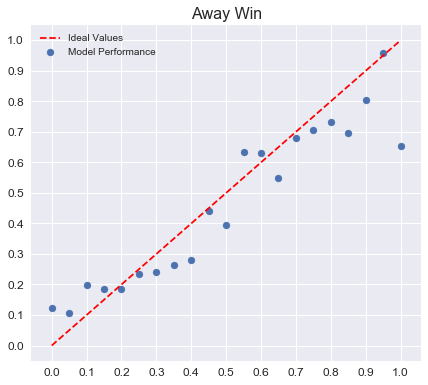

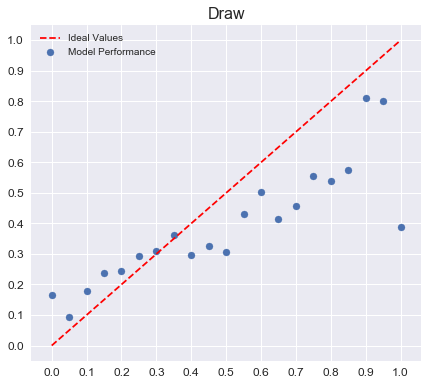

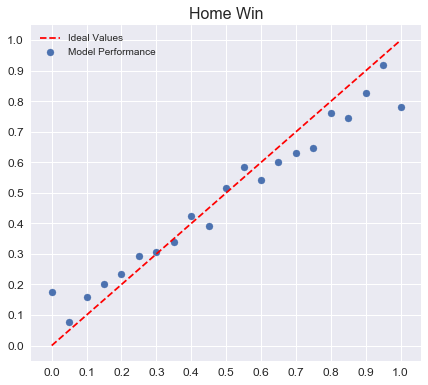

1.0999878706899258

In [25]:
y_pred = mlp.predict(X_test)
eval_probs(y_prob, y_test, [-1,0,1],show_plot=True)

In [2]:
with open("./data/train/train_data.pkl") as infile:
    train_data = pkl.load(infile)
train_data = train_data.loc[train_data['match_id'] != 1510605206930]
train_data.shape
# with open("./data/train/train_data_with_team_attr.pkl") as infile:
#     train_data = pkl.load(infile)

(152073, 106)

In [196]:
# train_data.columns.values
temp_data = train_data.copy(deep = True)
# train_data  = temp_data.copy(deep = True)

In [197]:
train_data.columns.values

array(['season', 'stage', 'date_x', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'home_team',
       'away_team', 'buildUpPlaySpeed_x', 'buildUpPlayPassing_x',
       'chanceCreationPassing_x', 'chanceCreationCrossing_x',
       'chan

In [3]:
columns = ['date', 'B365H', 'B365D', 'B365A', 'home_team', 'away_team', 
           'winner', 'minute', 'H_Goal', 'A_Goal','goal_diff','home_avg_player_rating',
       'home_avg_player_potential', 'away_avg_player_rating',
       'away_avg_player_potential','H_Y_Card', 'A_Y_Card', 'H_R_Card', 'A_R_Card']
def preprocessData(train_data):
    train_data['goal_diff'] = train_data['H_Goal'] - train_data['A_Goal']
    train_data = train_data[columns]
    train_data.drop_duplicates(inplace=True, keep='first')
    X = train_data.drop(['winner', 'date', 'home_team', 'away_team'], axis=1)
    Y = train_data['winner']
    return (X,Y)

In [4]:
(X,Y) = preprocessData(train_data)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [200]:
X['home_avg_player_potential'].value_counts()

0.0    150267
Name: home_avg_player_potential, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Support Vector Classifier

In [ ]:
svc = svm.SVC(probability=True,cache_size=99999)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

y_prob = svc.predict_proba(X_test)

## Logistic Regression

In [ ]:
temp_cols = ['B365H', 'B365D', 'B365A','minute', 'H_Goal', 'A_Goal']
lr = LogisticRegression(n_jobs=-1,solver='saga',class_weight='balanced')
X_train = X_train[temp_cols]
X_test = X_test[temp_cols]
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

In [28]:
y_prob = lr.predict_proba(X_test)

# eval_probs(y_prob, y_test, [-1,0,1])

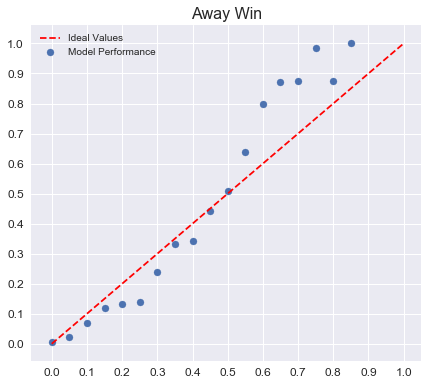

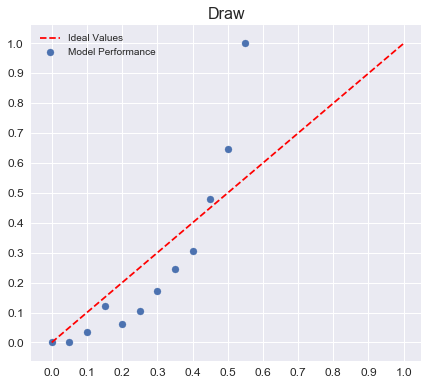

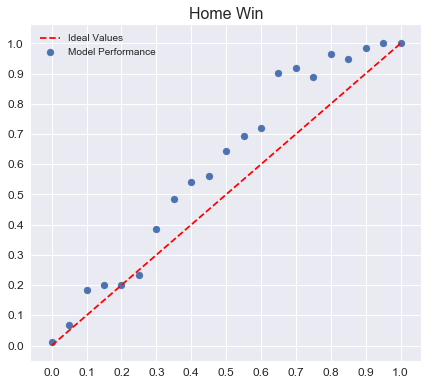

3.0770983553575397

In [29]:
eval_probs(y_prob, y_test, [-1,0,1], True)

In [16]:
temp_data = temp_data[columns]
X = temp_data.drop(['winner'], axis=1)
Y = temp_data['winner']
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, Y, test_size=0.1,shuffle= False)


In [63]:
# head = X_testA #1510605206930   1510602646114
# match_data = head.loc[head['match_id'] == 1510605206930]
# match_data=match_data.drop([  'date', 'match_id', 'home_team', 'away_team'], axis=1)
# y_prob= lr.predict_proba(match_data)


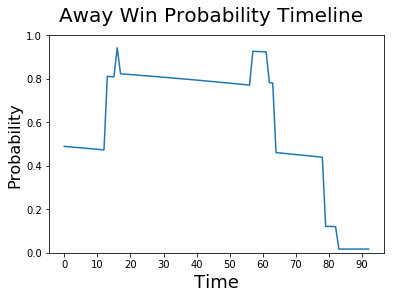

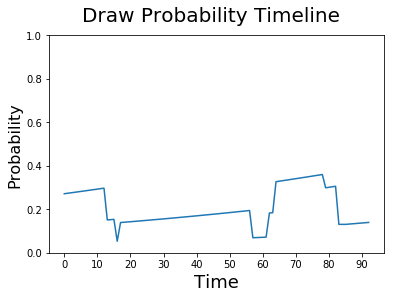

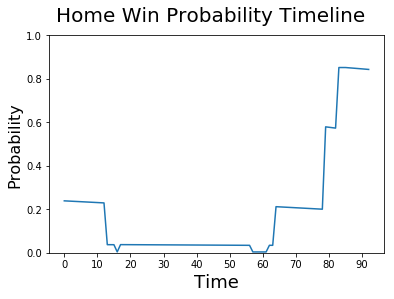

In [142]:
plot_prob_timeline(y_prob[:,0],'Away Win Probability Timeline')
plot_prob_timeline(y_prob[:,1],'Draw Probability Timeline')
plot_prob_timeline(y_prob[:,2],'Home Win Probability Timeline')

In [132]:
# y_zzzzprob[:,0],'Away Win Probability Timeline'


## K nearest neighbours

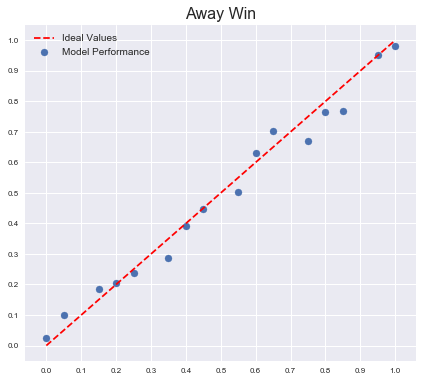

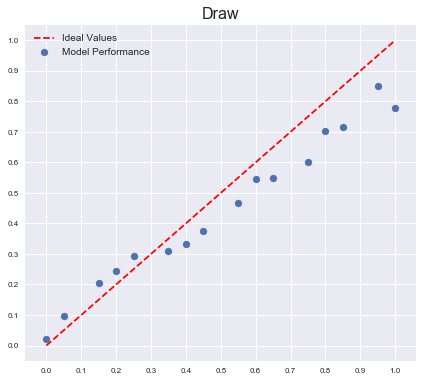

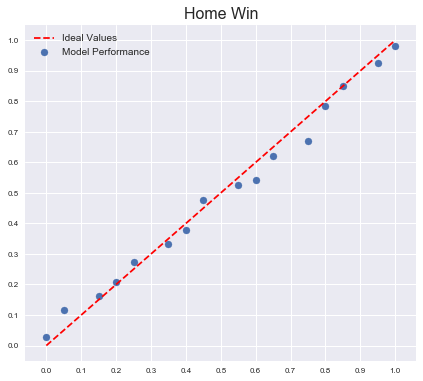

3.59055674851


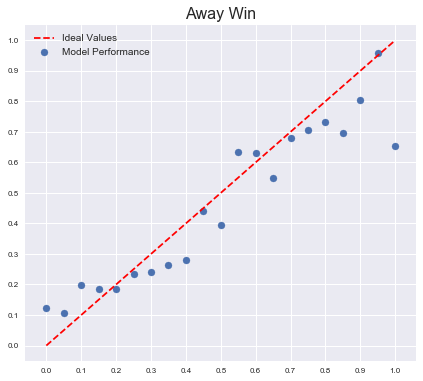

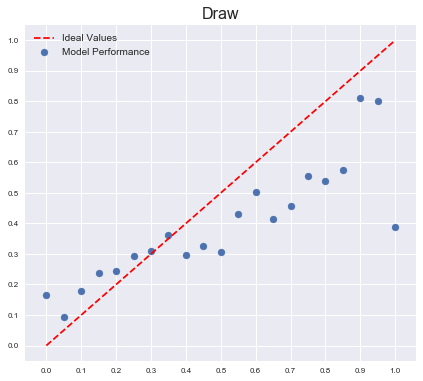

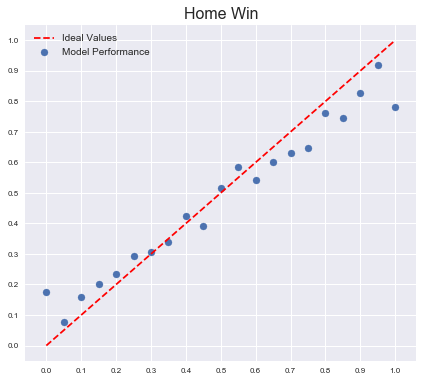

1.09998787069


In [21]:
#last checked, worked better with scaled data (0.98 RMSE)
for weight in ['uniform' , 'distance']:

    neigh = KNN(n_neighbors=15, algorithm='auto', weights=weight, n_jobs=-1)
    neigh.fit(X_train, y_train) 
    
    y_pred = neigh.predict(X_test)

#     print metrics.accuracy_score(y_test, y_pred)

    y_prob = neigh.predict_proba(X_test)
    print eval_probs(y_prob, y_test, [-1,0,1],show_plot=True)    
    
    
#     save_model(neigh, "KNN"+weight)

## Random Forest Classifier

0.692619950755


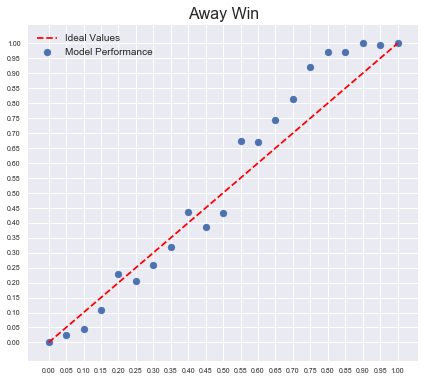

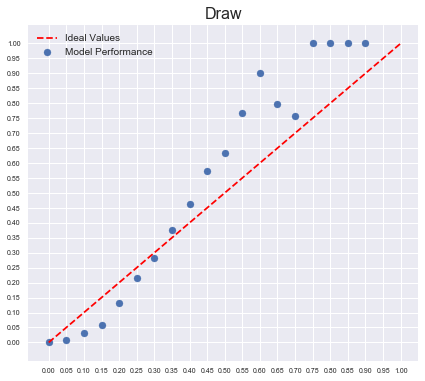

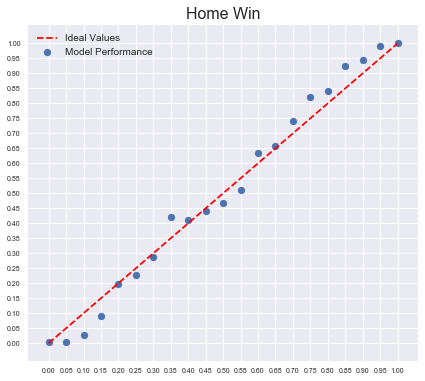

1.5640678505069203

In [10]:
rf = RandomForestClassifier(n_estimators=15,max_depth=8,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print metrics.accuracy_score(y_test, y_pred)

y_prob = rf.predict_proba(X_test)

eval_probs(y_prob, y_test, [-1,0,1],show_plot=True)

In [37]:
X_train.shape

(135324, 15)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

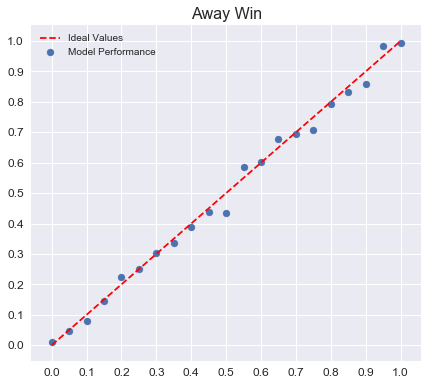

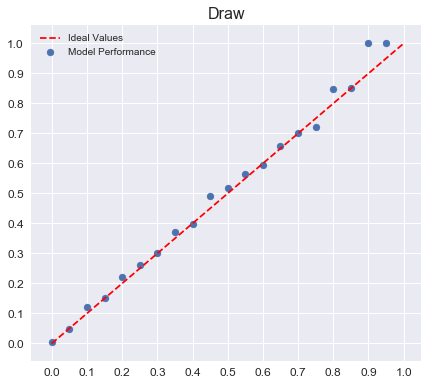

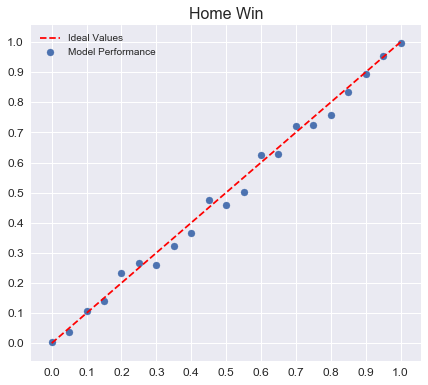

311
312
313
314
315
316
317
318
319
320
1.02135880622


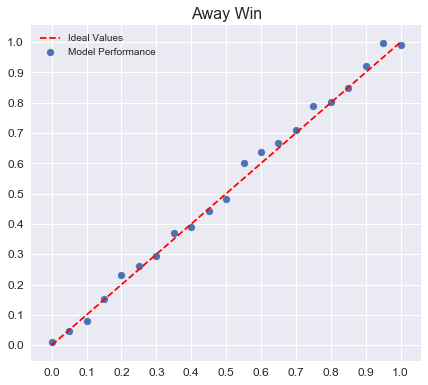

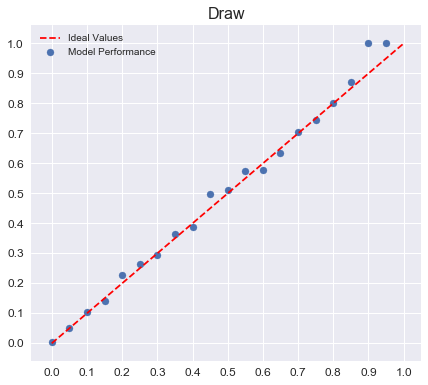

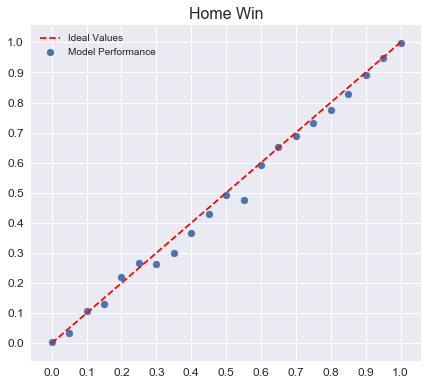

321
322
323
324
325
326
327
328
329
330
1.02417680805


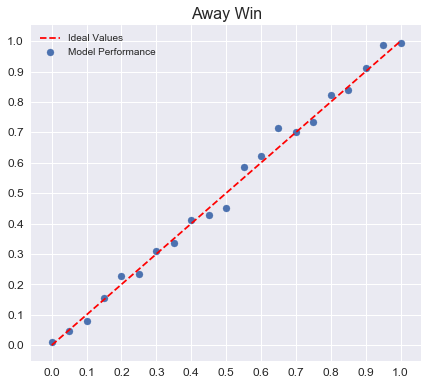

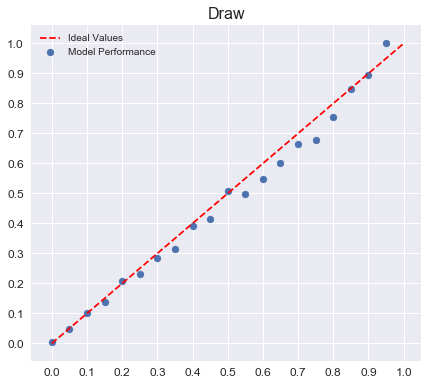

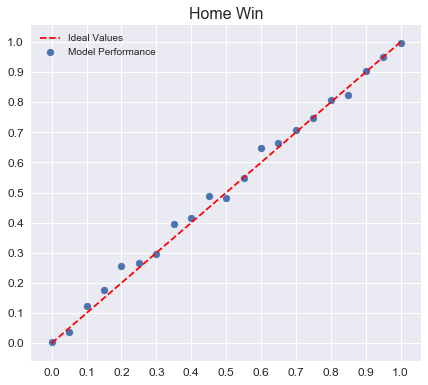

331
332
333
334
335
336
337
338
339
340
1.02741300024


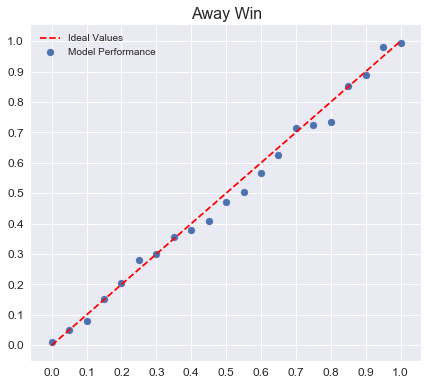

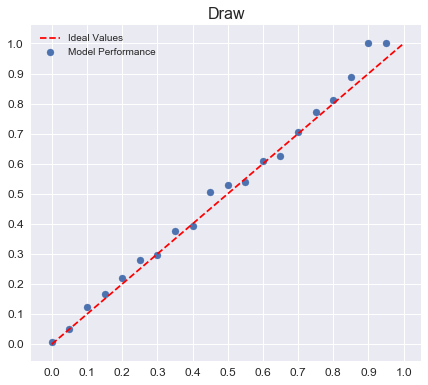

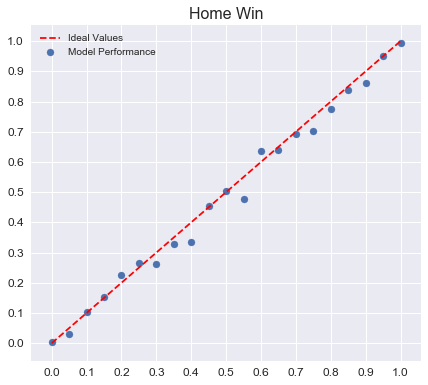

341
342
343
344
345
346
347
348
349
350
1.02173657579


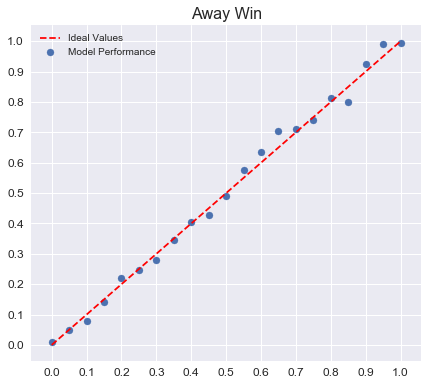

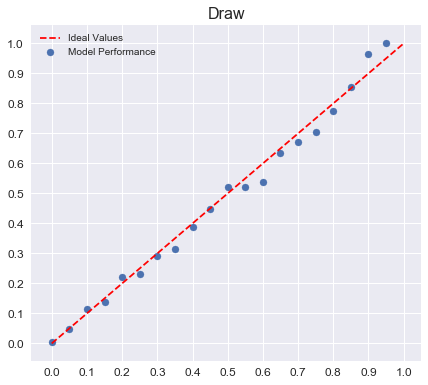

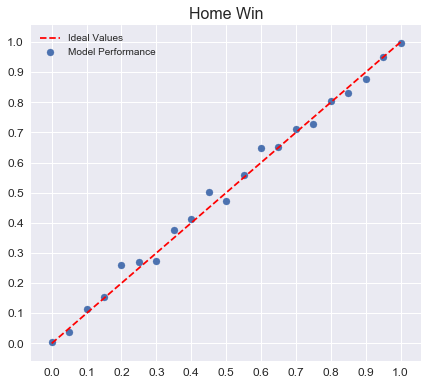

351
352
353
354
355
356
357
358
359
360
0.197867450346


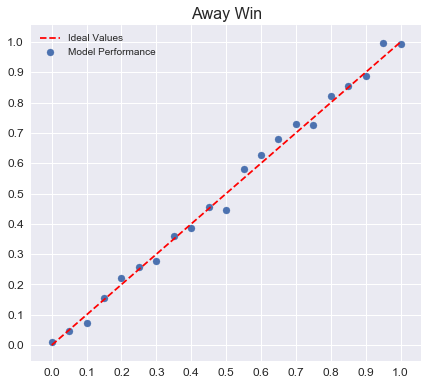

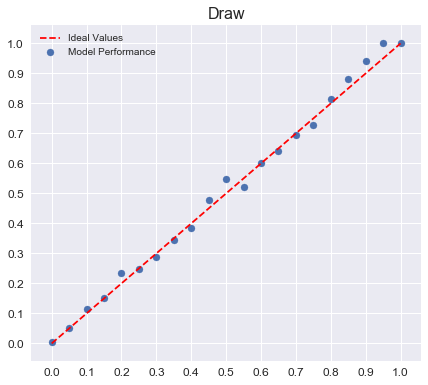

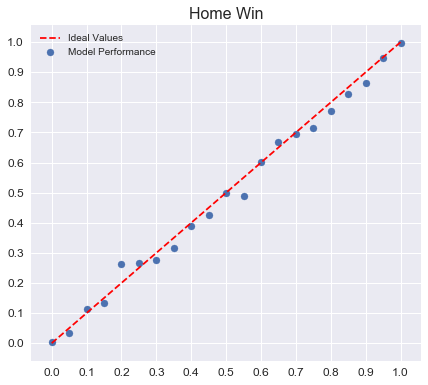

361
362
363
364
365
366
367
368
369
370
0.228828283176


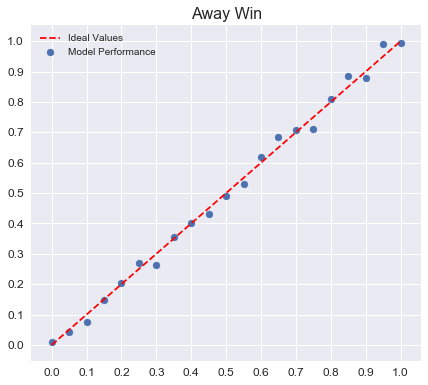

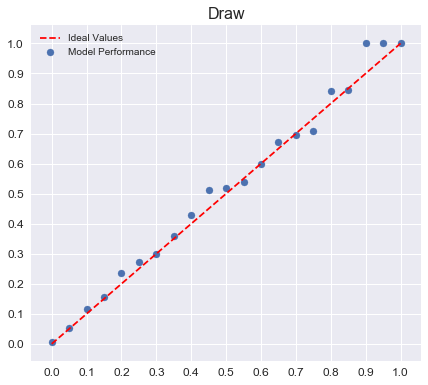

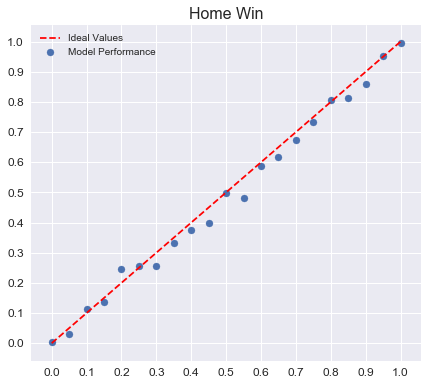

371
372
373
374
375
376
377
378
379
380
0.242044504408


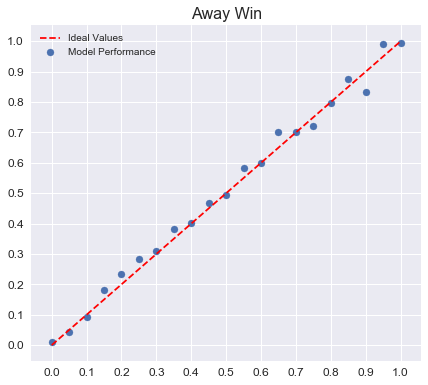

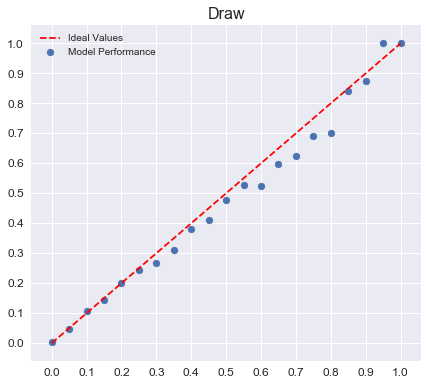

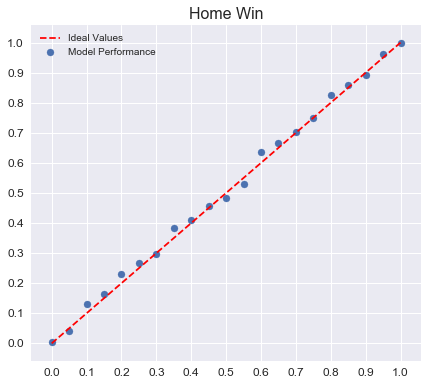

381
382
383
384
385
386
387
388
389
390
0.215979002529


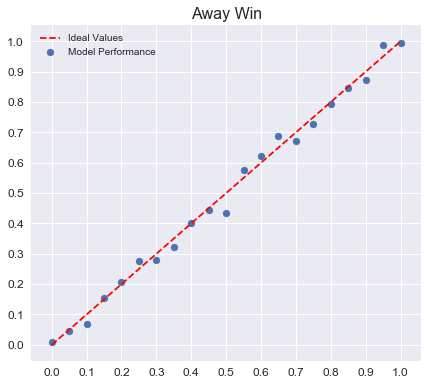

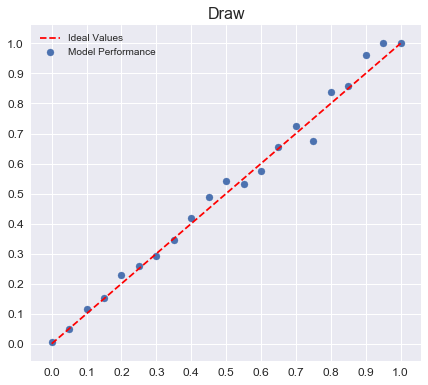

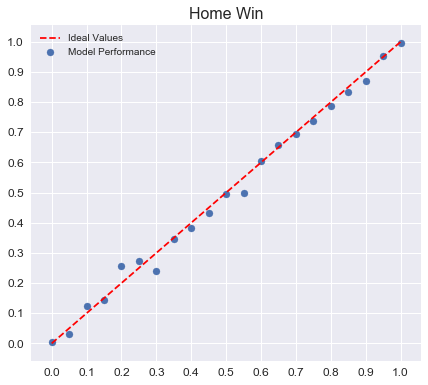

391
392
393
394
395
396
397
398
399
400
0.270041182889


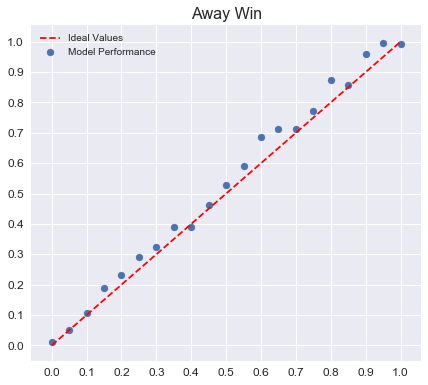

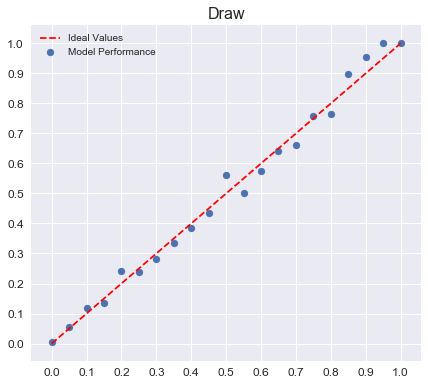

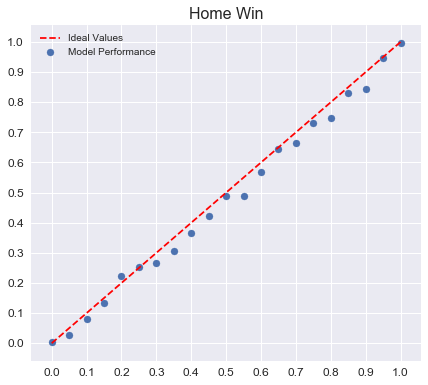

401
402
403
404
405
406
407
408
409
410
0.186847851714


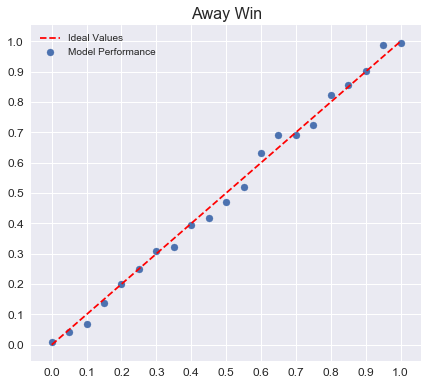

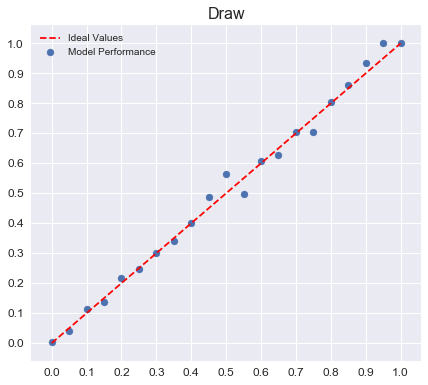

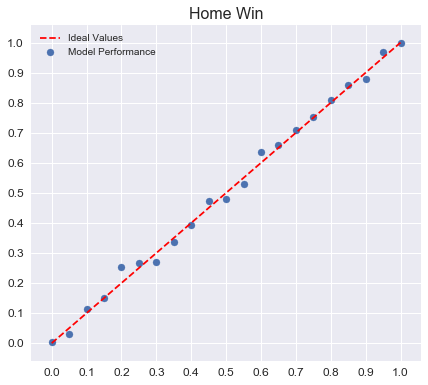

411
412
413
414
415
416
417
418
419
420
0.234527244694


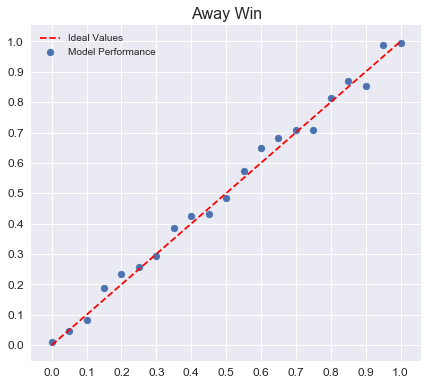

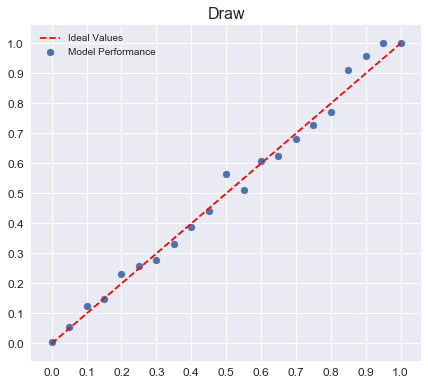

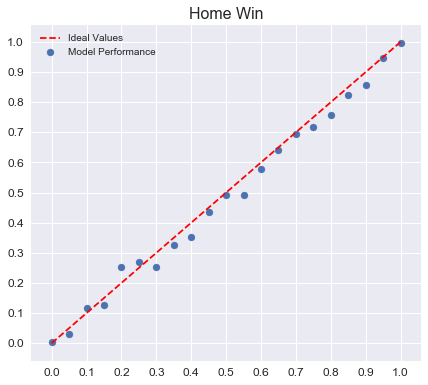

421
422
423
424
425
426
427
428
429
430
0.226071513984


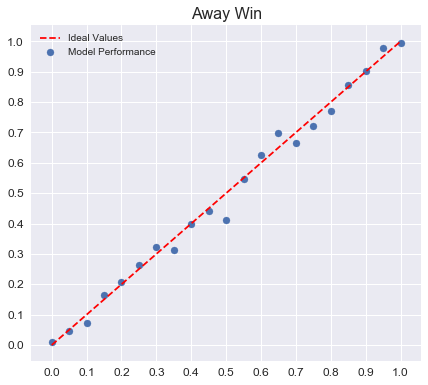

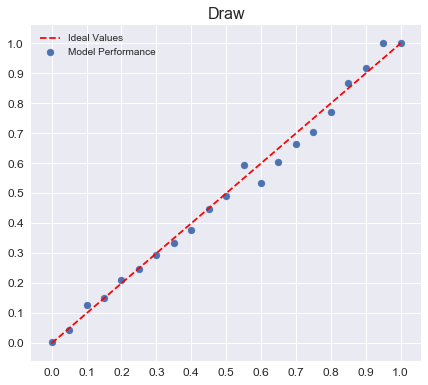

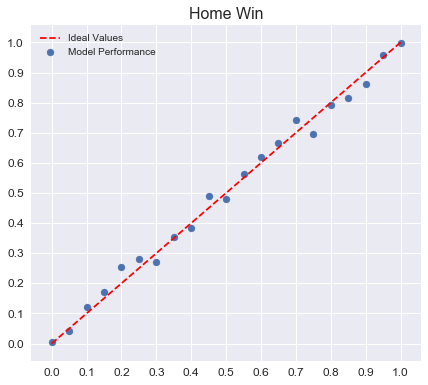

431
432
433
434
435
436
437
438
439
440
0.236164802296


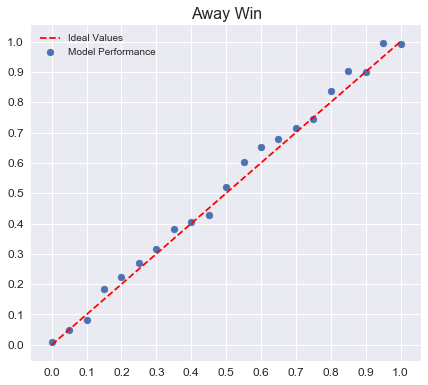

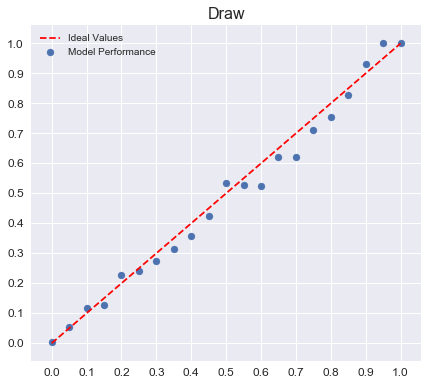

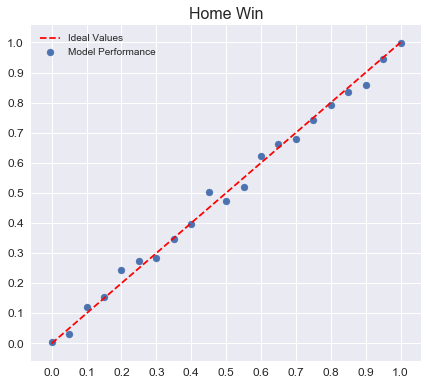

441
442
443
444
445
446
447
448
449
450
0.172535902831


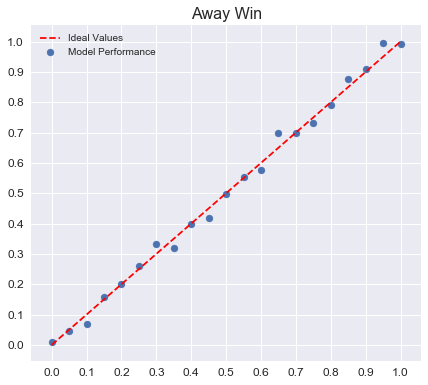

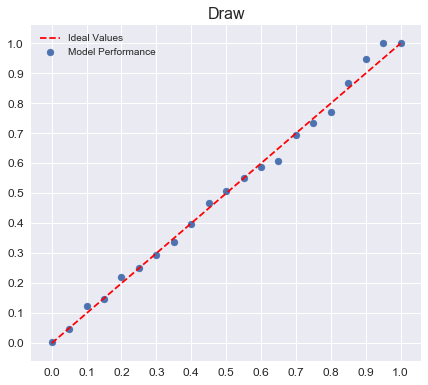

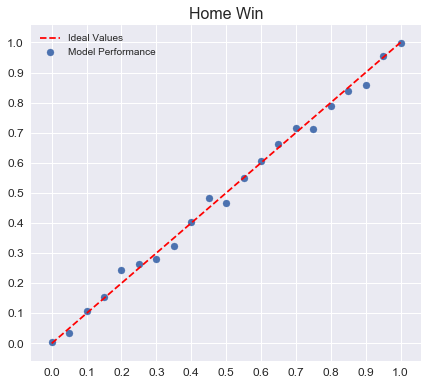

451
452
453
454
455
456
457
458
459
460
0.220651698688


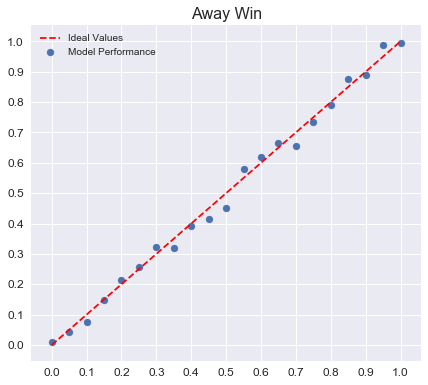

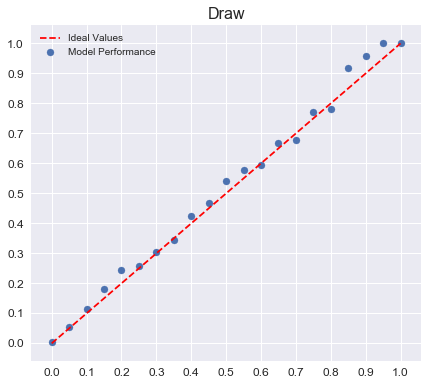

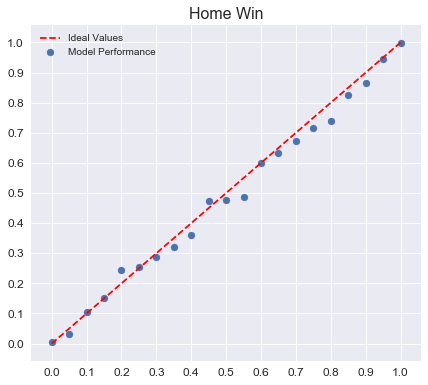

461
462
463
464
465
466
467
468
469
470
0.201953795241


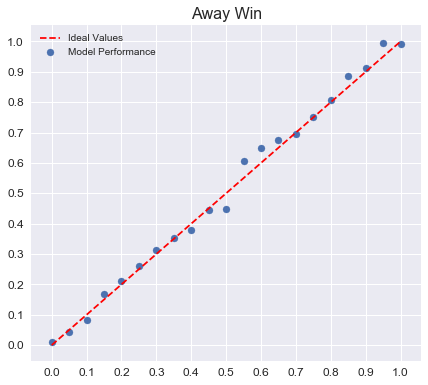

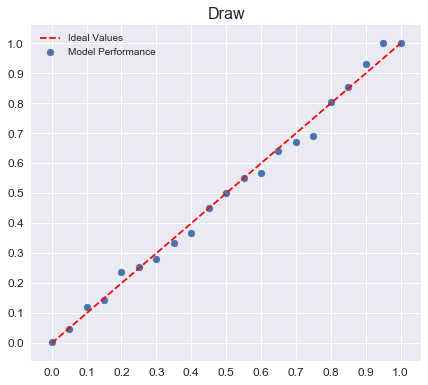

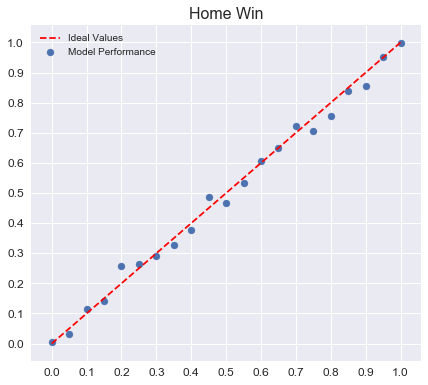

471
472
473
474
475
476
477
478
479
480
0.188545530927


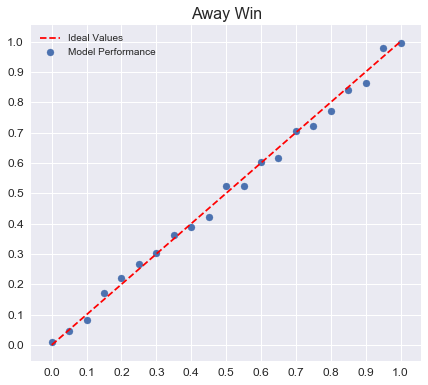

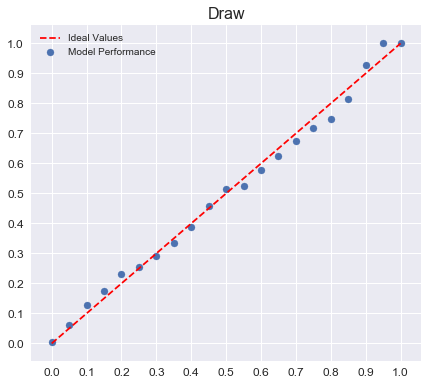

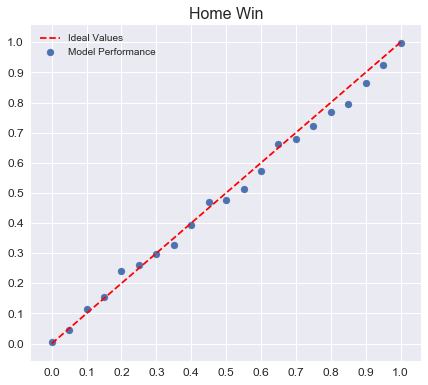

481
482
483
484
485
486
487
488
489
490
0.18653190555


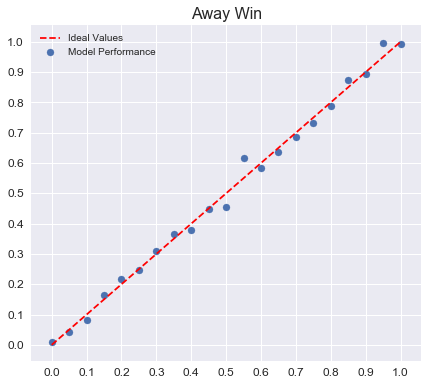

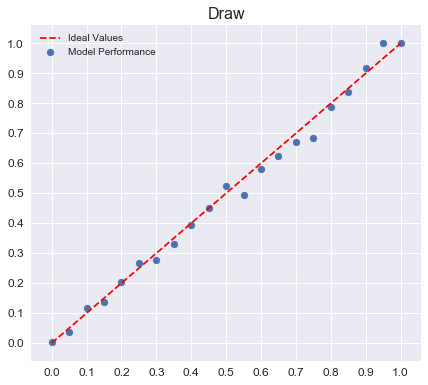

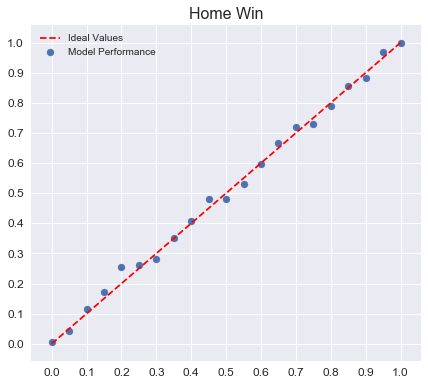

491
492
493
494
495
496
497
498
499


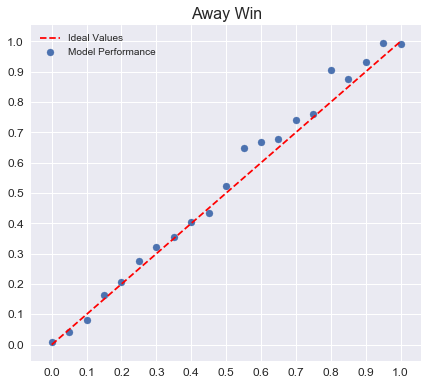

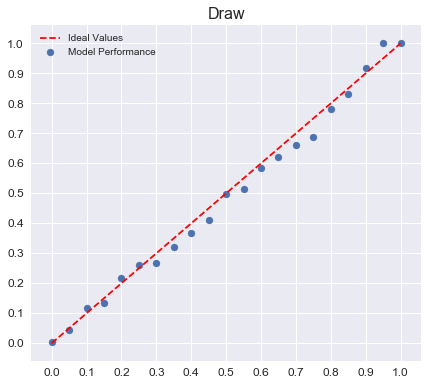

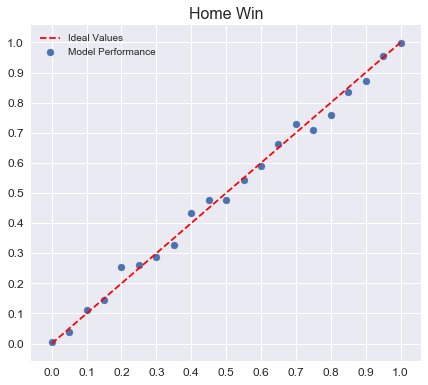

0.2515590742119563

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', learning_rate='constant',
                   learning_rate_init=0.0001, max_iter=100, early_stopping=False, tol=0.00001, verbose=False,
                   warm_start=True)

for i in range(500):
    print i
    mlp.fit(X_train,y_train)
    if i>300 and i%10 == 0:
        y_pred = mlp.predict(X_test)
        y_prob = mlp.predict_proba(X_test)
        error =  eval_probs(y_prob, y_test, [-1,0,1],show_plot=False)
        print error
        if error <=1.08:
            eval_probs(y_prob, y_test, [-1,0,1],show_plot=True)

y_pred = mlp.predict(X_test)

# print metrics.accuracy_score(y_test, y_pred)

y_prob = mlp.predict_proba(X_test)

eval_probs(y_prob, y_test, [-1,0,1],show_plot=True)

In [81]:
with open("./data/train/train_data.pkl") as infile:
    temp_data = pkl.load(infile)


In [82]:
match_ids = temp_data['match_id']

In [ ]:
for i in range(1,len(match_ids)):
    print match_ids[i]

1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
1510571589386
151057

1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
1510571045447
151057

1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
1510572258272
151057

1510571135728
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
1510570568175
151057

1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510572126632
1510571084122
1510571084122
1510571084122
1510571084122
1510571084122
151057

1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510570900417
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
1510572012452
151057

1510572329877
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
1510570854811
151057

1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
1510570904026
151057

1510572047661
1510572047661
1510572047661
1510572047661
1510572047661
1510572047661
1510572047661
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
1510572245225
151057

1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
1510572167364
151057

1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
1510571687667
151057

1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510570744421
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
1510571877515
151057

1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
1510573365933
151057

1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574498848
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
1510574452346
151057

1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
1510572893968
151057

In [157]:
plot_data = temp_data.loc[temp_data['match_id'] == 1510573681650]
X,Y= preprocessData(plot_data)
y_prob = mlp.predict_proba(X)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [158]:
X

,B365H,B365D,B365A,minute,H_Goal,A_Goal,goal_diff,home_avg_player_rating,home_avg_player_potential,away_avg_player_rating,away_avg_player_potential,H_Y_Card,A_Y_Card,H_R_Card,A_R_Card
29493,1.73,3.4,5.5,0,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29494,1.73,3.4,5.5,1,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29495,1.73,3.4,5.5,2,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29496,1.73,3.4,5.5,3,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29497,1.73,3.4,5.5,4,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29498,1.73,3.4,5.5,5,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29499,1.73,3.4,5.5,6,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29500,1.73,3.4,5.5,7,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29501,1.73,3.4,5.5,8,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0
29502,1.73,3.4,5.5,9,0,0,0,155.0,0.0,153.181818,0.0,0,0,0,0


(91L, 3L)


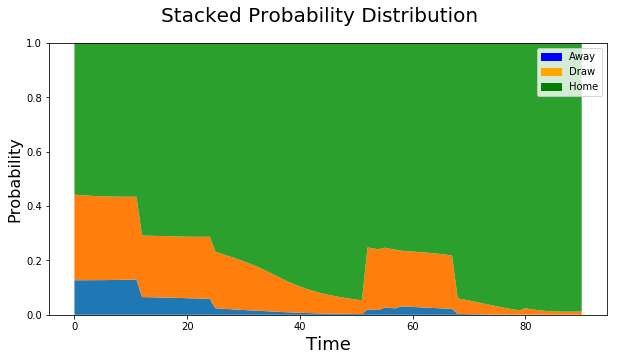

In [159]:
data = y_prob
label = "Stacked Probability Distribution"
# x = range(0, 91, 10)
# fig = plt.figure()
x = np.arange(data.shape[0])
fig, ax = plt.subplots()
print y_prob.shape
fig.suptitle(label, fontsize=20)
plt.ylim([0,1])
fig.set_figheight(5)
fig.set_figwidth(10)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Probability', fontsize=16)
blue_patch = mpatches.Patch(color='blue', label='Away')
orange_patch = mpatches.Patch(color='orange', label='Draw')
green_patch = mpatches.Patch(color='green', label='Home')

plt.legend(handles=[blue_patch,orange_patch,green_patch])
y_prob.reshape(3,-1)
temp =y_prob.T
ax.stackplot(x, temp)
plt.show()


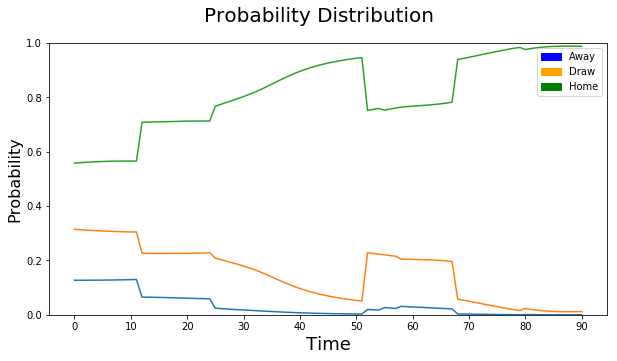

In [160]:
label = "Probability Distribution"
xtick = range(0, 91, 10)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
a = plt.plot(data[:,0])
d = plt.plot(data[:,1])
h = plt.plot(data[:,2])
fig.suptitle(label, fontsize=20)
dim = 300
plt.ylim([0,1])

plt.xlabel('Time', fontsize=18)
plt.ylabel('Probability', fontsize=16)
blue_patch = mpatches.Patch(color='blue', label='Away')
orange_patch = mpatches.Patch(color='orange', label='Draw')
green_patch = mpatches.Patch(color='green', label='Home')

plt.legend(handles=[blue_patch,orange_patch,green_patch])
plt.xticks(xtick)
plt.show()

In [161]:
X_test_copy= X_test.copy(deep=True)
# X_test_copy = preprocessData(X_test_copy)
X_test_copy['H_Prob'] = np.reciprocal(X_test_copy['B365H']);
X_test_copy['D_Prob'] = np.reciprocal(X_test_copy['B365D']);
X_test_copy['A_Prob'] = np.reciprocal(X_test_copy['B365A']);
X_test_copy['Prob_Sum'] = 0;

def calculate_total_proba(row):
    return (row['H_Prob'] + row['D_Prob'] + row["A_Prob"])*100

X_test_copy['Prob_Sum'] = X_test_copy.apply(calculate_total_proba, axis=1)
# X_test_copy.reset_index(inplace = True)
print "D"

D


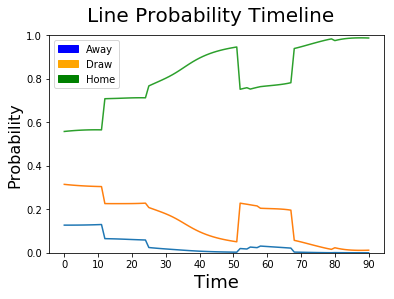

In [162]:
fig = plot_prob_timeline(y_prob,'Line Probability Timeline')
fig.set_figheight(5)
fig.set_figwidth(10)

In [163]:
y_prior = X_test_copy[['A_Prob','D_Prob','H_Prob']]
# 


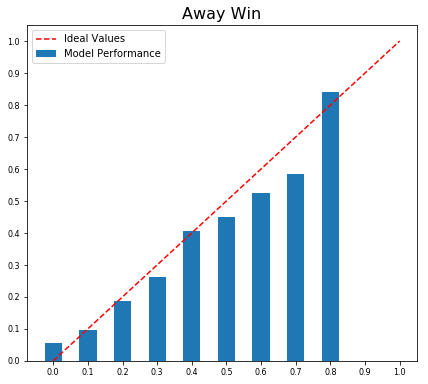

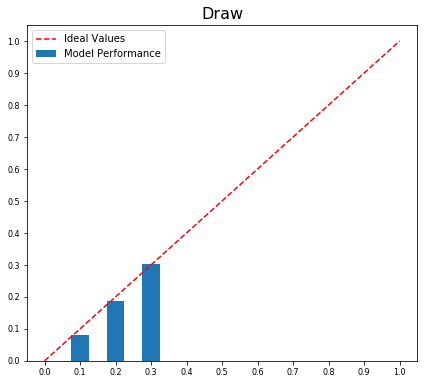

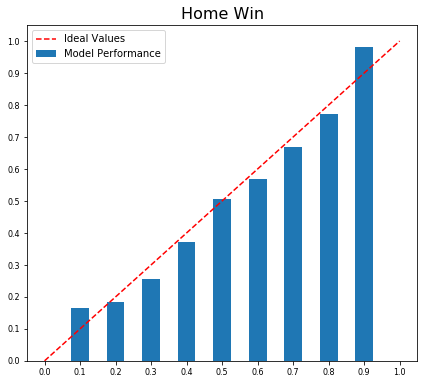

2.138595427760828

In [164]:
eval_probs(y_prior.as_matrix(), y_test, [-1,0,1],show_plot=True)